In [9]:
#Predict whether public or private 1=Private, 0=Public

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('College_Data')
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## The Data
We will use a data frame with 777 observations on the following 18 variables.

Private A factor with levels No and Yes indicating private or public university

Apps Number of applications received

Accept Number of applications accepted

Enroll Number of new students enrolled

Top10perc Pct. new students from top 10% of H.S. class

Top25perc Pct. new students from top 25% of H.S. class

F.Undergrad Number of fulltime undergraduates

P.Undergrad Number of parttime undergraduates

Outstate Out-of-state tuition

Room.Board Room and board costs

Books Estimated book costs

Personal Estimated personal spending

PhD Pct. of faculty with Ph.D.’s

Terminal Pct. of faculty with terminal degree

S.F.Ratio Student/faculty ratio

perc.alumni Pct. alumni who donate

Expend Instructional expenditure per student

Grad.Rate Graduation rate

In [2]:
df = pd.read_csv('College_Data',index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [10]:
dummies = pd.get_dummies(df['Private'])
dummies

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
772,1,0
773,0,1
774,0,1
775,0,1


In [11]:
dummies = pd.get_dummies(df['Private'],drop_first=True)
dummies

,Yes
0,1
1,1
2,1
3,1
4,1
...,...
772,0
773,1
774,1
775,1


In [12]:
df = pd.concat([df,dummies],axis=1)
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Yes
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [20]:
df.drop(['Private',],axis=1,inplace=True)

In [22]:
df.columns

Index(['Unnamed: 0', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Yes'],
      dtype='object')

In [23]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
df.head(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1


In [38]:
corr = df.corr()

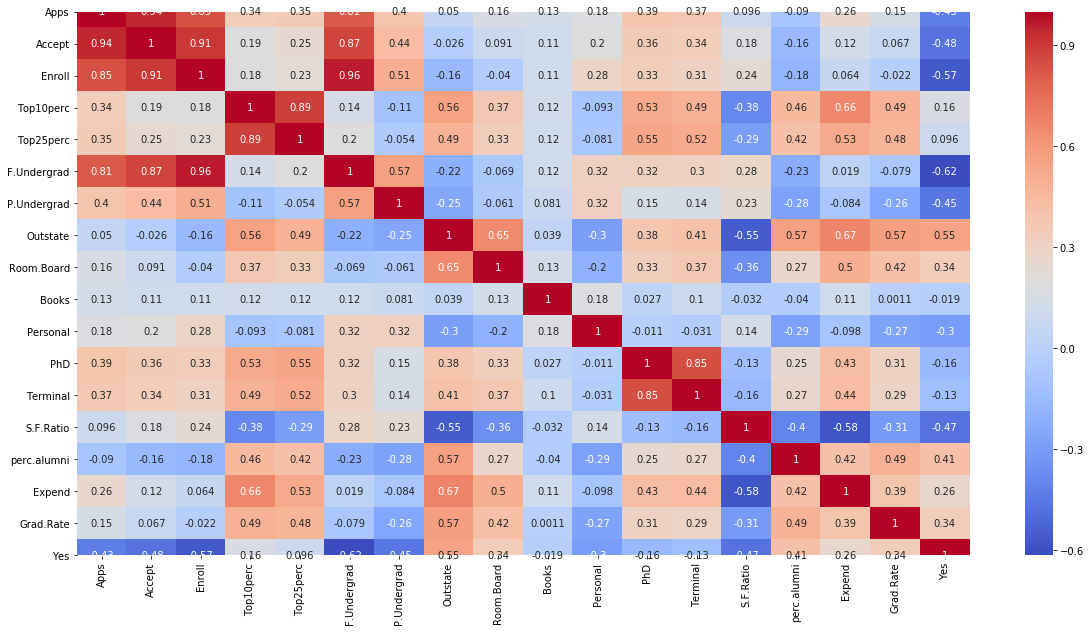

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [36]:
#Drop Features that Correlate a lot with other Features
#Drop Enroll, 
df.drop('Enroll',axis=1,inplace=True)

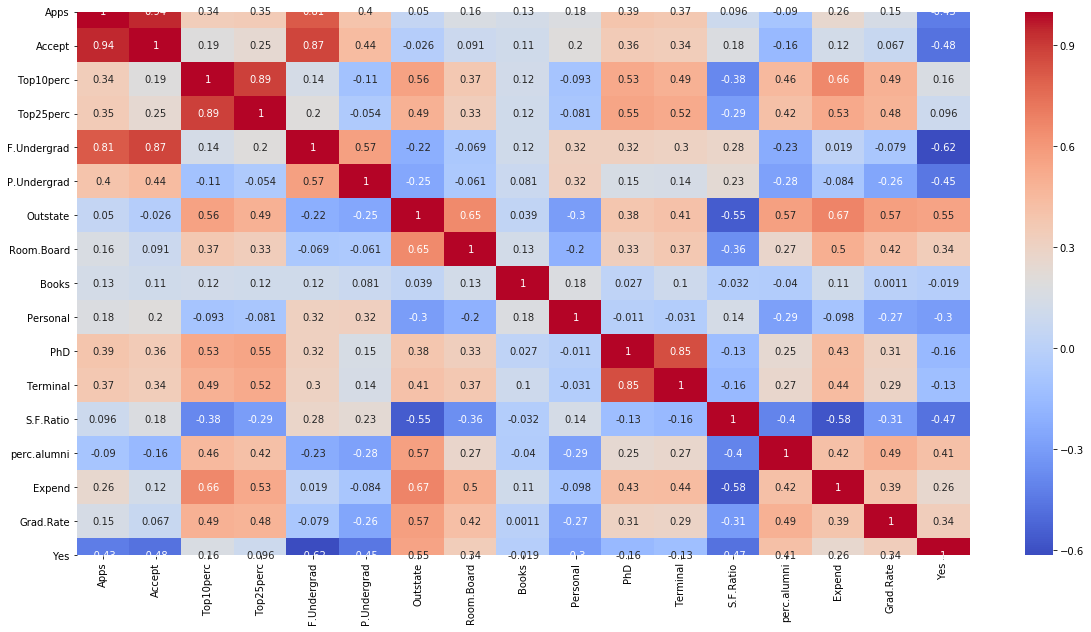

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [45]:
# X and Y
X = df.drop('Yes',axis=1)
y = df['Yes']

#Split Data in Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

#Baseline Model - Adjust Params by hand 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

#Instanciate a Model
#keep basline estimaters for now
rfc = RandomForestClassifier(n_estimators=100)

#Fit the Model on Training Data
rfc.fit(X_train, y_train)

#Make Predictions
#Tune model of Val Data since we want to adjust Hyperparams
y_preds = rfc.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

#Compare Y_TEST vs PREDICTIONS 
print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.95      0.97      0.96       115

    accuracy                           0.94       156
   macro avg       0.92      0.91      0.92       156
weighted avg       0.94      0.94      0.94       156

[[ 35   6]
 [  4 111]]
